In [3]:
import numpy as np
import torch
import arviz as az
import matplotlib.pyplot as plt

In [37]:
trace=torch.load('mlruns/1/a09cbb444b17402bb4a968b4b3a00aa3/artifacts/theta.pt').unsqueeze(0).numpy()
# well mixd HMC 'mlruns/1/236421be1ce94b88a11d540645fd8346/artifacts/theta.pt'
trace.shape

(1, 1999, 151)

In [9]:
data=az.convert_to_inference_data(trace)
data.posterior


<xarray.Dataset>
Dimensions:  (chain: 1, draw: 2000, x_dim_0: 151)
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 ... 143 144 145 146 147 148 149 150
Data variables:
    x        (chain, draw, x_dim_0) float32 -0.26897022 -0.26104793 ... 2.277994
Attributes:
    created_at:     2020-05-13T21:39:33.636920
    arviz_version:  0.7.0

0.891913419973082

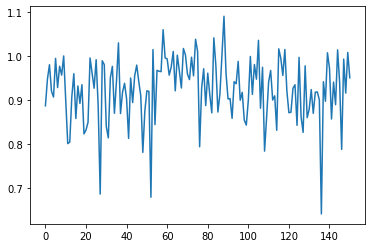

In [10]:
ress=az.ess(data, relative=True, method='bulk')
arr=ress.to_dict()['data_vars']['x']['data']
plt.plot(arr)
arr[17]

/home/yann/anaconda3/envs/myenv/lib/python3.8/site-packages/arviz/plots/plot_utils.py:647: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (151) in plot_ess, generating only 40 plots
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5c011e50>,
      dtype=object)

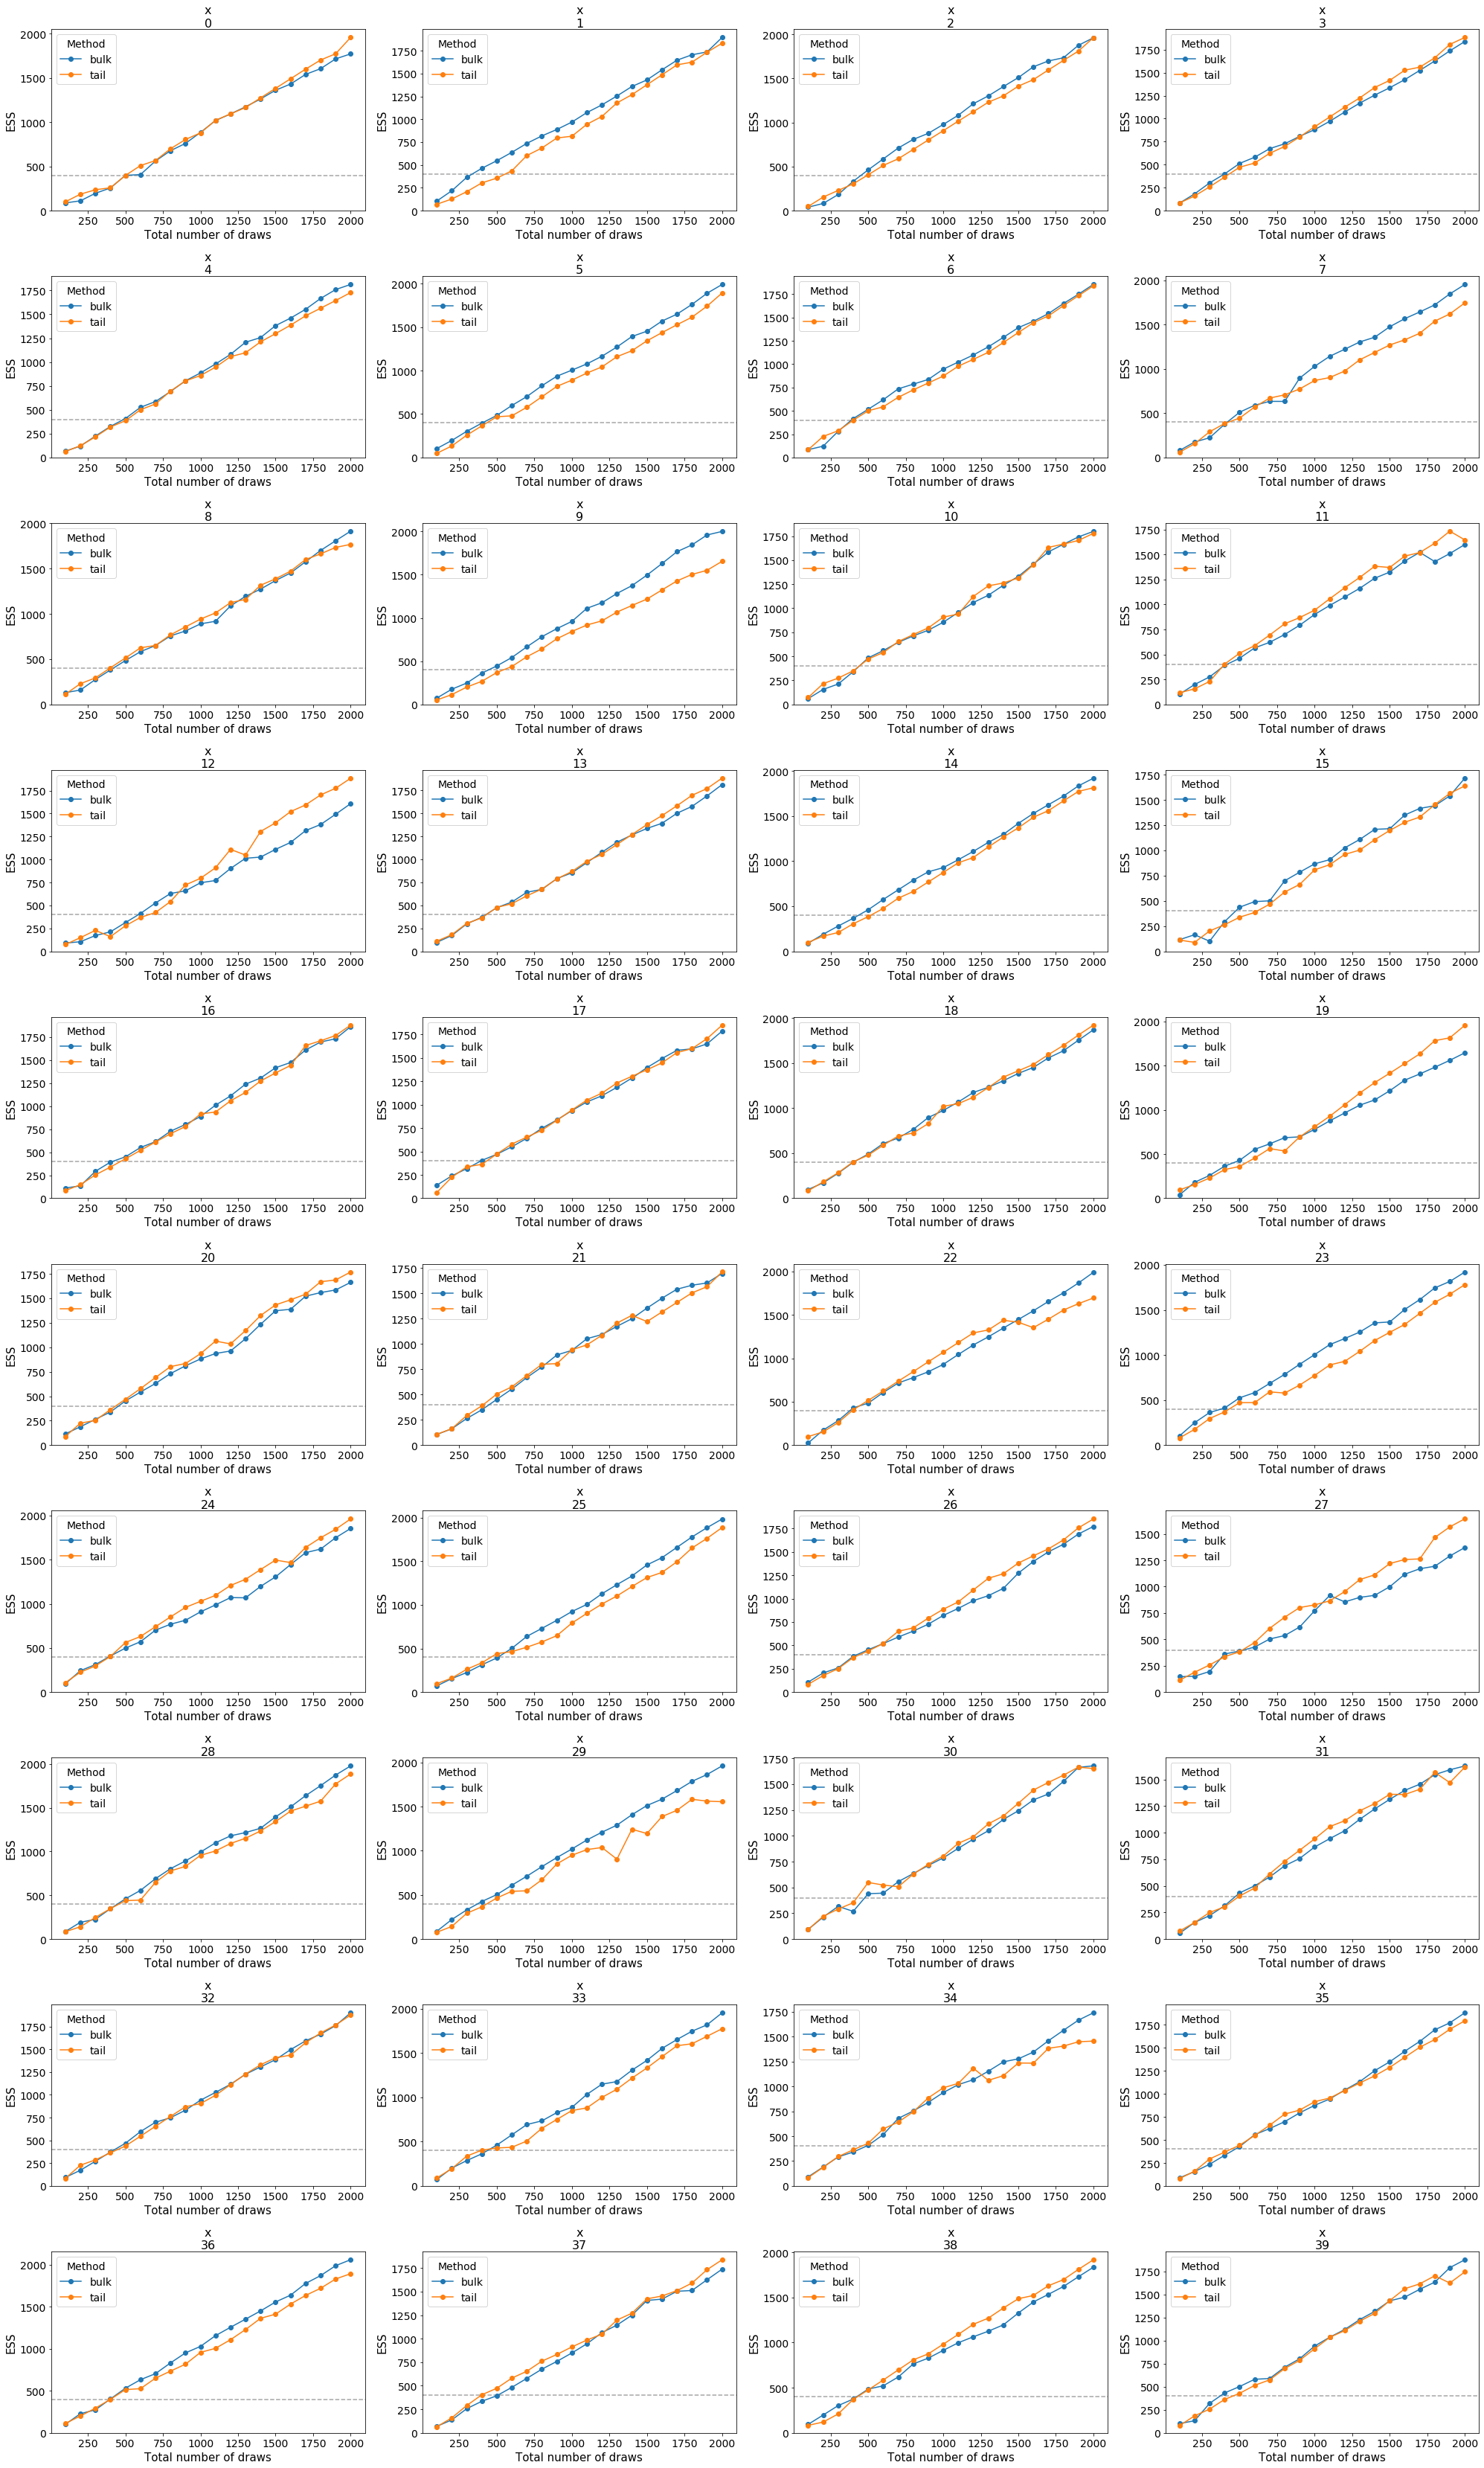

In [11]:
az.plot_ess(data,var_names=['x'],kind="evolution")

/home/yann/anaconda3/envs/myenv/lib/python3.8/site-packages/arviz/plots/plot_utils.py:647: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (151) in plot_autocorr, generating only 40 plots
  warnings.warn(


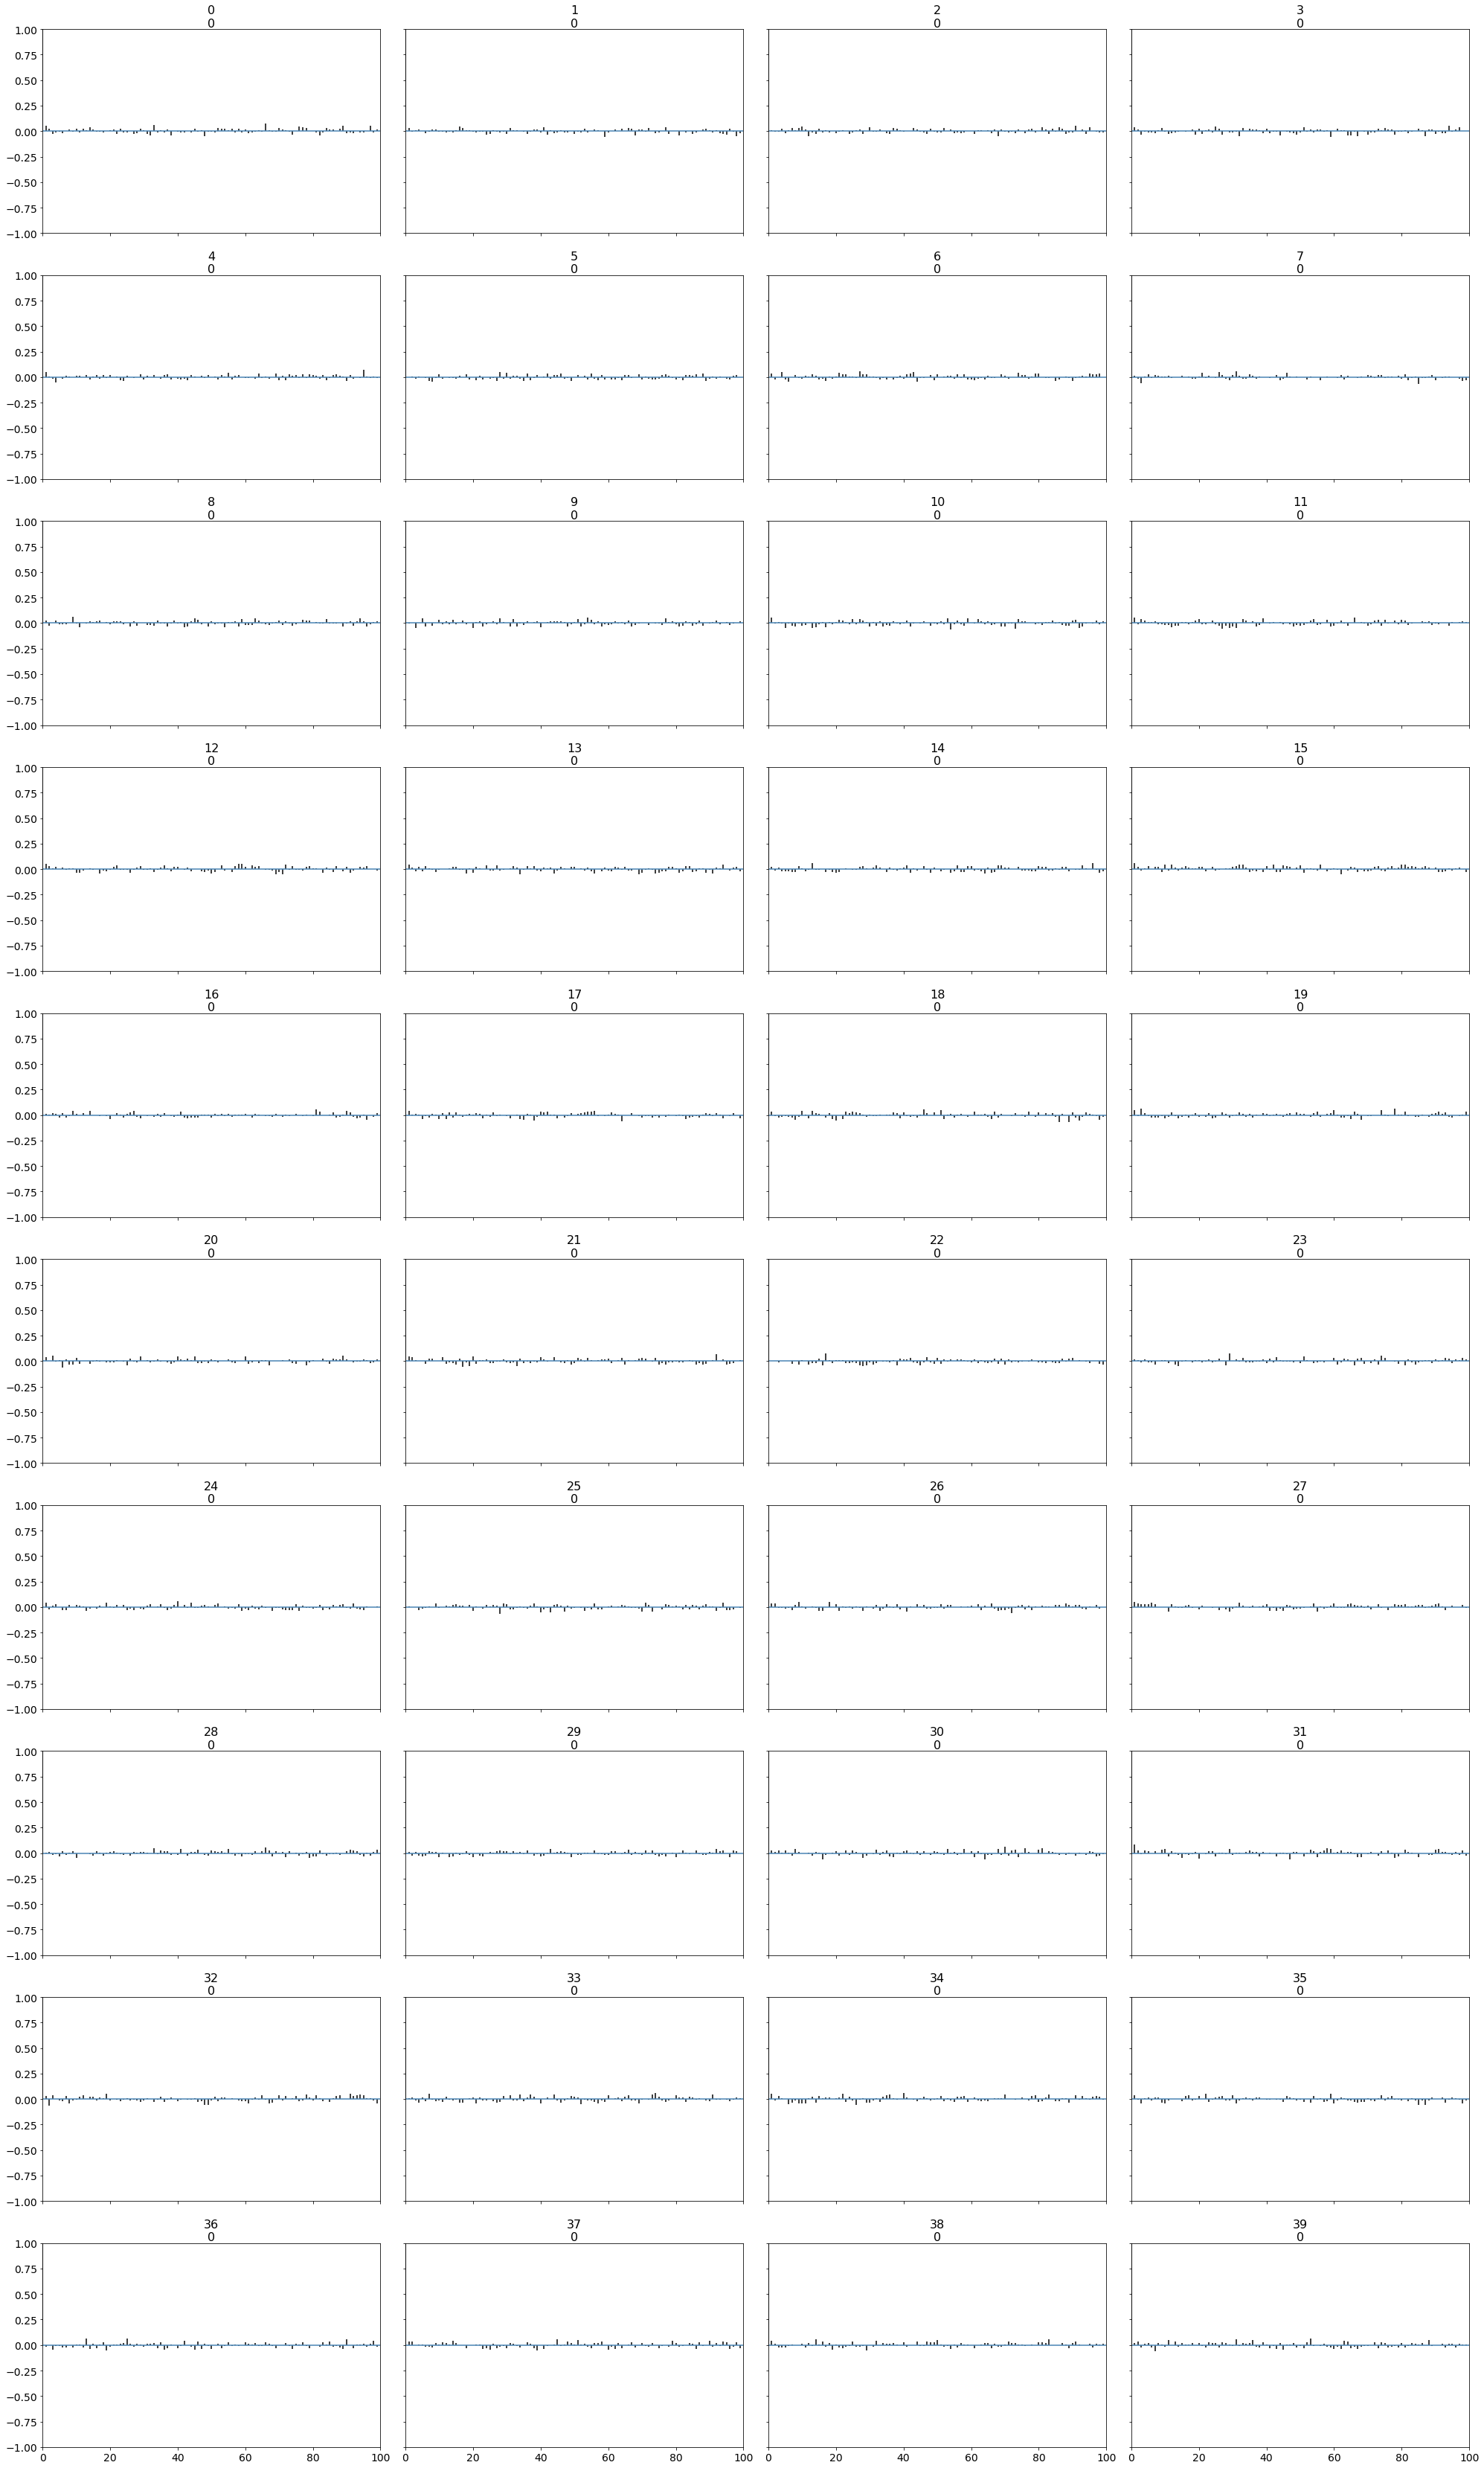

In [168]:
az.plot_autocorr(data);


In [12]:
ress_l=[ress[i].values for i in range(trace.shape[1])]

KeyError: 0

In [18]:
np.mean(ress_l), np.std(ress_l)

NameError: name 'trac' is not defined

In [41]:
trace=trace.squeeze()
draws=trace.shape[0]
if draws % 2 ==1:
    trace=trace[0:-1]
half_draws=int(trace.shape[0]/2)
print(half_draws)

trace_0=trace[0:half_draws]
trace_1=trace[half_draws:]
folded_trace=np.stack([trace_0,trace_1])
folded_data=az.convert_to_inference_data(folded_trace)
folded_data.posterior


999


<xarray.Dataset>
Dimensions:  (chain: 2, draw: 999, x_dim_0: 151)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 ... 143 144 145 146 147 148 149 150
Data variables:
    x        (chain, draw, x_dim_0) float32 0.78230846 1.9097975 ... 1.8889846
Attributes:
    created_at:     2020-05-13T22:05:39.102297
    arviz_version:  0.7.0

In [42]:
az.rhat(folded_data)

<xarray.Dataset>
Dimensions:  (x_dim_0: 151)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 ... 143 144 145 146 147 148 149 150
Data variables:
    x        (x_dim_0) float64 1.007 1.017 1.047 1.038 ... 1.093 1.027 1.028

In [172]:
keys=np.arange(trace.shape[1])
trace_f=np.stack([trace[0:999,:],trace[1000:-1,:]],1)
data_2=dict(zip(keys, trace_f.T))
trace_f.shape

(999, 2, 151)

In [13]:
int(1999/2)

999

In [192]:
rhat_data=az.rhat(data_2)
rhat_data

<xarray.Dataset>
Dimensions:  ()
Data variables:
    0        float64 1.001
    1        float64 1.001
    2        float64 1.0
    3        float64 0.9998
    4        float64 0.9996
    5        float64 1.0
    6        float64 1.002
    7        float64 1.001
    8        float64 1.002
    9        float64 0.9993
    10       float64 1.001
    11       float64 1.0
    12       float64 1.001
    13       float64 1.001
    14       float64 1.0
    15       float64 0.9999
    16       float64 1.0
    17       float64 0.9997
    18       float64 1.0
    19       float64 0.9999
    20       float64 0.9993
    21       float64 1.001
    22       float64 1.001
    23       float64 1.0
    24       float64 1.001
    25       float64 1.003
    26       float64 1.001
    27       float64 1.0
    28       float64 0.9998
    29       float64 0.9995
    30       float64 1.002
    31       float64 0.9994
    32       float64 0.9998
    33       float64 1.0
    34       float64 0.9992
    35       float64 0.9993
    36       float64 1.0
    37       float64 1.001
    38       float64 1.002
    39       float64 0.9998
    40       float64 1.001
    41       float64 1.003
    42       float64 1.0
    43       float64 1.0
    44       float64 1.001
    45       float64 1.0
    46       float64 0.9999
    47       float64 1.0
    48       float64 0.9996
    49       float64 1.0
    50       float64 1.001
    51       float64 1.003
    52       float64 1.002
    53       float64 0.9994
    54       float64 0.9996
    55       float64 1.001
    56       float64 0.9999
    57       float64 0.9997
    58       float64 0.9996
    59       float64 0.9996
    60       float64 0.9996
    61       float64 1.0
    62       float64 1.001
    63       float64 0.9999
    64       float64 1.0
    65       float64 0.9997
    66       float64 1.001
    67       float64 1.0
    68       float64 0.9995
    69       float64 1.002
    70       float64 0.9995
    71       float64 1.0
    72       float64 1.0
    73       float64 1.0
    74       float64 0.9997
    75       float64 1.001
    76       float64 1.002
    77       float64 0.9999
    78       float64 0.9994
    79       float64 1.0
    80       float64 1.002
    81       float64 0.9998
    82       float64 1.002
    83       float64 1.001
    84       float64 0.9998
    85       float64 1.002
    86       float64 1.0
    87       float64 1.0
    88       float64 1.001
    89       float64 1.0
    90       float64 1.0
    91       float64 1.001
    92       float64 1.0
    93       float64 1.001
    94       float64 0.9997
    95       float64 1.0
    96       float64 1.0
    97       float64 0.9995
    98       float64 1.0
    99       float64 0.9996
    100      float64 1.001
    101      float64 1.001
    102      float64 1.003
    103      float64 0.9995
    104      float64 1.0
    105      float64 0.9994
    106      float64 1.0
    107      float64 1.001
    108      float64 1.001
    109      float64 1.0
    110      float64 1.001
    111      float64 1.001
    112      float64 0.9995
    113      float64 0.9996
    114      float64 0.9994
    115      float64 1.0
    116      float64 0.9996
    117      float64 1.0
    118      float64 0.9992
    119      float64 1.001
    120      float64 1.0
    121      float64 0.9994
    122      float64 0.9995
    123      float64 1.0
    124      float64 1.0
    125      float64 0.9999
    126      float64 1.0
    127      float64 1.002
    128      float64 1.001
    129      float64 1.001
    130      float64 1.001
    131      float64 1.0
    132      float64 1.001
    133      float64 1.0
    134      float64 0.9992
    135      float64 1.001
    136      float64 1.0
    137      float64 0.9995
    138      float64 1.001
    139      float64 0.9996
    140      float64 1.001
    141      float64 1.001
    142      float64 0.9998
    143      float64 0.9999
    144      float64 0.9995
    145      float64 1.002
    146      float64 1.0
    147      floa

In [191]:
rhat_l=[rhat_data[i].values for i in range(trace.shape[1])]
np.mean(rhat_l),np.std(rhat_l)

(1.0003747283892088, 0.0008415770690717092)

In [196]:
toy=torch.randn(2000,150).numpy()

data_toy=dict(zip(keys, toy.T))


In [197]:
ess_toy=az.ess(data_toy, relative=True)
ess_toy

<xarray.Dataset>
Dimensions:  ()
Data variables:
    0        float64 0.754
    1        float64 0.9469
    2        float64 1.043
    3        float64 0.9602
    4        float64 0.7934
    5        float64 1.024
    6        float64 0.8967
    7        float64 0.9907
    8        float64 0.9847
    9        float64 0.9793
    10       float64 0.9038
    11       float64 0.9349
    12       float64 1.057
    13       float64 1.003
    14       float64 1.008
    15       float64 1.065
    16       float64 0.9364
    17       float64 0.905
    18       float64 0.925
    19       float64 0.9389
    20       float64 0.8968
    21       float64 0.9957
    22       float64 0.9802
    23       float64 1.011
    24       float64 0.9747
    25       float64 0.9871
    26       float64 0.9865
    27       float64 0.8608
    28       float64 0.9124
    29       float64 1.025
    30       float64 0.9476
    31       float64 1.027
    32       float64 0.9271
    33       float64 1.039
    34       float64 1.02
    35       float64 0.8783
    36       float64 0.9847
    37       float64 0.9887
    38       float64 1.015
    39       float64 0.8788
    40       float64 0.9341
    41       float64 1.001
    42       float64 1.004
    43       float64 1.079
    44       float64 0.9857
    45       float64 1.078
    46       float64 0.9824
    47       float64 0.9369
    48       float64 0.9628
    49       float64 1.033
    50       float64 0.9376
    51       float64 0.9358
    52       float64 1.038
    53       float64 0.9205
    54       float64 1.012
    55       float64 0.9592
    56       float64 0.958
    57       float64 0.972
    58       float64 0.9793
    59       float64 0.9375
    60       float64 0.8797
    61       float64 1.033
    62       float64 1.07
    63       float64 0.9693
    64       float64 1.027
    65       float64 0.9199
    66       float64 0.9598
    67       float64 0.9888
    68       float64 0.9453
    69       float64 1.02
    70       float64 0.8898
    71       float64 1.038
    72       float64 0.9345
    73       float64 0.9532
    74       float64 1.016
    75       float64 0.9751
    76       float64 1.056
    77       float64 0.8769
    78       float64 0.8878
    79       float64 0.805
    80       float64 1.061
    81       float64 0.9495
    82       float64 0.9314
    83       float64 1.009
    84       float64 0.951
    85       float64 0.9276
    86       float64 1.034
    87       float64 0.9904
    88       float64 1.018
    89       float64 0.9789
    90       float64 0.9424
    91       float64 0.9669
    92       float64 0.9687
    93       float64 0.9147
    94       float64 0.9346
    95       float64 1.008
    96       float64 0.8895
    97       float64 1.0
    98       float64 1.025
    99       float64 0.9488
    100      float64 1.031
    101      float64 1.0
    102      float64 0.9434
    103      float64 0.9538
    104      float64 1.03
    105      float64 0.9059
    106      float64 0.9025
    107      float64 0.9686
    108      float64 0.9622
    109      float64 0.9586
    110      float64 0.9112
    111      float64 0.8141
    112      float64 0.981
    113      float64 0.9763
    114      float64 0.9111
    115      float64 0.9685
    116      float64 0.8405
    117      float64 0.7839
    118      float64 1.127
    119      float64 1.04
    120      float64 0.9219
    121      float64 1.019
    122      float64 0.9028
    123      float64 0.9392
    124      float64 1.124
    125      float64 0.9095
    126      float64 0.9788
    127      float64 0.9909
    128      float64 0.9351
    129      float64 0.9807
    130      float64 1.093
    131      float64 0.997
    132      float64 0.946
    133      float64 0.9028
    134      float64 0.9943
    135      float64 0.8675
    136      float64 0.9525
    137      float64 1.009
    138      float64 1.035
    139      float64 1.069
    140      float64 1.018
    141      float64 0.9367
    142      float64 1.005
    143     

In [201]:
ess_toy_=[ess_toy[i].values for i in range(150)]
np.mean(ess_toy_),np.std(ess_toy_)

(0.9686506330272546, 0.06356888562168078)

In [202]:
toy2=torch.randn(2000,2,150).numpy()
data_toy2=dict(zip(keys, toy2.T))

In [206]:
rhat_toy=az.rhat(data_3)
rhat_toy

<xarray.Dataset>
Dimensions:  ()
Data variables:
    0        float64 1.0
    1        float64 0.9996
    2        float64 1.0
    3        float64 1.0
    4        float64 1.0
    5        float64 0.9998
    6        float64 1.0
    7        float64 0.9997
    8        float64 0.9998
    9        float64 1.002
    10       float64 0.9999
    11       float64 0.9999
    12       float64 1.001
    13       float64 1.0
    14       float64 0.9998
    15       float64 0.9998
    16       float64 0.9999
    17       float64 1.0
    18       float64 0.9997
    19       float64 1.001
    20       float64 1.0
    21       float64 1.001
    22       float64 1.0
    23       float64 1.001
    24       float64 1.0
    25       float64 1.0
    26       float64 0.9997
    27       float64 1.001
    28       float64 1.0
    29       float64 1.0
    30       float64 1.0
    31       float64 1.0
    32       float64 1.001
    33       float64 0.9997
    34       float64 0.9999
    35       float64 1.0
    36       float64 1.0
    37       float64 0.9999
    38       float64 1.0
    39       float64 1.0
    40       float64 1.0
    41       float64 0.9997
    42       float64 1.001
    43       float64 1.0
    44       float64 1.0
    45       float64 1.0
    46       float64 1.001
    47       float64 0.9998
    48       float64 1.0
    49       float64 1.0
    50       float64 1.0
    51       float64 1.0
    52       float64 1.001
    53       float64 0.9997
    54       float64 1.0
    55       float64 0.9996
    56       float64 0.9999
    57       float64 0.9997
    58       float64 1.0
    59       float64 1.0
    60       float64 1.0
    61       float64 0.9996
    62       float64 1.001
    63       float64 0.9998
    64       float64 1.0
    65       float64 1.001
    66       float64 1.0
    67       float64 1.0
    68       float64 1.0
    69       float64 1.0
    70       float64 1.001
    71       float64 1.001
    72       float64 0.9997
    73       float64 1.0
    74       float64 1.0
    75       float64 1.001
    76       float64 1.001
    77       float64 1.0
    78       float64 1.0
    79       float64 1.001
    80       float64 0.9999
    81       float64 1.0
    82       float64 1.0
    83       float64 1.0
    84       float64 1.0
    85       float64 0.9997
    86       float64 1.001
    87       float64 1.001
    88       float64 1.0
    89       float64 1.0
    90       float64 1.0
    91       float64 1.0
    92       float64 1.0
    93       float64 1.002
    94       float64 0.9999
    95       float64 0.9999
    96       float64 1.002
    97       float64 1.001
    98       float64 1.0
    99       float64 1.001
    100      float64 1.0
    101      float64 1.0
    102      float64 1.0
    103      float64 0.9997
    104      float64 1.001
    105      float64 1.0
    106      float64 1.001
    107      float64 1.0
    108      float64 1.002
    109      float64 0.9997
    110      float64 1.0
    111      float64 1.0
    112      float64 1.0
    113      float64 0.9997
    114      float64 1.001
    115      float64 0.9995
    116      float64 1.0
    117      float64 0.9999
    118      float64 1.0
    119      float64 1.001
    120      float64 0.9998
    121      float64 1.0
    122      float64 1.0
    123      float64 1.0
    124      float64 1.0
    125      float64 1.0
    126      float64 1.001
    127      float64 1.001
    128      float64 1.001
    129      float64 0.9999
    130      float64 1.0
    131      float64 1.0
    132      float64 1.0
    133      float64 1.0
    134      float64 1.0
    135      float64 0.9998
    136      float64 1.001
    137      float64 1.0
    138      float64 0.9998
    139      float64 1.0
    140      float64 1.0
    141      float64 1.0
    142      float64 1.0
    143      float64 0.9998
    144      float64 1.001
    145      float64 1.001
    146      float64 1.0
    147      float64 1.0
    148      float64 1.0
    149      float64 0.9998

In [208]:
rhat_toy_l=[rhat_toy[i].values for i in range(150)]
np.mean(rhat_toy_l),np.std(rhat_toy_l)

(1.0002561728780461, 0.0004471919534920983)